# IC Coding Etiquette and Excel Reporting Part 2

## List of Contents:
## 01. Importing Libraries
## 02. Importing Data
## 03. Creating a Customer Profile - Age
## 04. Creating a Customer Profile - Income
## 05. Creating a Customer Profile - Finalization
## 06. Export Charts and Data

## --

## 01. Importing Libraries

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Importing Data

In [2]:
#Assigning path for import
path = r'C:\Users\Mosspants\Desktop\CareerFoundry\A4_Python_Fundamentals_for_Data_Analysts\Instacart Basket Analysis_10_2023'

In [3]:
#Importing orders_products_all_regular
ords_prods = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'orders_products_all_regular.pkl'))

In [4]:
#Checking import with head
ords_prods.head()

,user_id,state,age,date_joined,number_of_dependants,family_status,income,order_id,order_number,order_day_of_week,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,average_days_since_prior_order,frequency_flag,region,exclusion_flag
0,26711,Missouri,48,1/1/2017,3,married,165665,2543867,5.0,1.0,...,Busiest Days,Most Orders,8.0,New Customer,12.6,High Spender,30.0,Non-frequent Customer,Midwest,Regular-activity
1,26711,Missouri,48,1/1/2017,3,married,165665,1285508,7.0,5.0,...,Regular Days,Most Orders,8.0,New Customer,12.6,High Spender,30.0,Non-frequent Customer,Midwest,Regular-activity
2,26711,Missouri,48,1/1/2017,3,married,165665,2578584,8.0,1.0,...,Busiest Days,Most Orders,8.0,New Customer,12.6,High Spender,30.0,Non-frequent Customer,Midwest,Regular-activity
3,26711,Missouri,48,1/1/2017,3,married,165665,423547,2.0,2.0,...,Regular Days,Most Orders,8.0,New Customer,12.6,High Spender,30.0,Non-frequent Customer,Midwest,Regular-activity
4,26711,Missouri,48,1/1/2017,3,married,165665,2524893,3.0,3.0,...,Slowest Days,Most Orders,8.0,New Customer,12.6,High Spender,30.0,Non-frequent Customer,Midwest,Regular-activity


In [5]:
#Checking import with head
ords_prods.shape

(30993489, 31)

In [6]:
#Checking name of columns in orders_products_all_regular
ords_prods.columns

Index(['user_id', 'state', 'age', 'date_joined', 'number_of_dependants',
       'family_status', 'income', 'order_id', 'order_number',
       'order_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', '_merge',
       'product_name', 'aisle_id', 'department_id', 'prices', 'price_label',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'average_days_since_prior_order',
       'frequency_flag', 'region', 'exclusion_flag'],
      dtype='object')

## 03. Creating a Customer Profile - Age

In [7]:
#Checking description on age
ords_prods['age'].describe()

count    3.099349e+07
mean     4.946786e+01
std      1.848521e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

### Based on the min, max, and mean of ages we can divide them into groups.

In [8]:
#Condition Ages 18-32
ords_prods.loc[(ords_prods['age'] >= 18) & (ords_prods['age'] < 33), 'age_group'] = 'Age 18-32'

C:\Users\Mosspants\AppData\Local\Temp\ipykernel_20188\2790227552.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Age 18-32' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ords_prods.loc[(ords_prods['age'] >= 18) & (ords_prods['age'] < 33), 'age_group'] = 'Age 18-32'


In [9]:
#Condition Ages 33-48
ords_prods.loc[(ords_prods['age'] >= 33) & (ords_prods['age'] < 49), 'age_group'] = 'Age 33-48'

In [10]:
#Condition Ages 49-64
ords_prods.loc[(ords_prods['age'] >= 49) & (ords_prods['age'] < 65), 'age_group'] = 'Age 49-64'

In [11]:
#Condition Ages 65-81
ords_prods.loc[ords_prods['age'] >= 65, 'age_group'] = 'Age 65-81'

In [12]:
#Checking value_counts of age_group
ords_prods['age_group'].value_counts(dropna = False).sort_index()

age_group
Age 18-32    7291981
Age 33-48    7762524
Age 49-64    7736068
Age 65-81    8202916
Name: count, dtype: int64

In [13]:
#Checking shape of age_group
ords_prods['age_group'].shape

(30993489,)

Text(0, 0.5, 'Number of Customers (In Millions)')

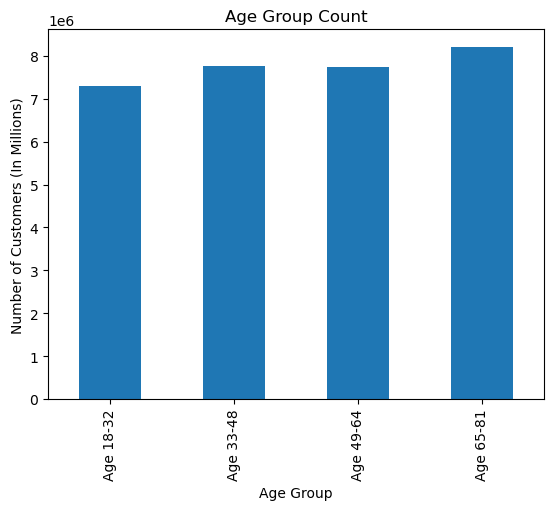

In [15]:
#Frequency table of age_group
age_group_bar = ords_prods['age_group'].value_counts().sort_index().plot.bar()
plt.title('Age Group Count')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers (In Millions)')

## 04. Creating a Customer Profile - Income

In [16]:
#Checking description on income
ords_prods['income'].describe()

count    3.099349e+07
mean     9.967349e+04
std      4.313999e+04
min      2.590300e+04
25%      6.728900e+04
50%      9.676500e+04
75%      1.281010e+05
max      5.939010e+05
Name: income, dtype: float64

In [17]:
#Checking value counts on income
ords_prods['income'].value_counts(dropna = False).sort_index()

income
25903      20
25911      28
25937      39
25941      31
25955     392
         ... 
584097    826
590790     54
591089    176
592409    318
593901    640
Name: count, Length: 96070, dtype: int64

### Based on the min, max, and mean of income we can divide them into groups.

In [18]:
#Condition income 25,903 - 67,289 Low income
ords_prods.loc[(ords_prods['income'] >= 25903) & (ords_prods['age'] < 67290), 'income_group'] = 'Low income'

C:\Users\Mosspants\AppData\Local\Temp\ipykernel_20188\1668476457.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Low income' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ords_prods.loc[(ords_prods['income'] >= 25903) & (ords_prods['age'] < 67290), 'income_group'] = 'Low income'


In [19]:
#Condition income 67,290 - 96,765 Medium-low income
ords_prods.loc[(ords_prods['income'] >= 67290) & (ords_prods['age'] < 96766), 'income_group'] = 'Medium-low income'

In [20]:
#Condition income 96,766 - 128,101 Medium-high income
ords_prods.loc[(ords_prods['income'] >= 96766) & (ords_prods['age'] < 128102), 'income_group'] = 'Medium-high income'

In [21]:
#Condition income 128,102 - 593,901 Low income
ords_prods.loc[ords_prods['income'] >= 128102, 'income_group'] = 'High income'

In [22]:
#Checking values of income_group
ords_prods['income_group'].value_counts(dropna = False).sort_index()

income_group
High income           7748242
Low income            7748456
Medium-high income    7747341
Medium-low income     7749450
Name: count, dtype: int64

In [23]:
#Checking shape of income_group
ords_prods['income_group'].shape

(30993489,)

Text(0, 0.5, 'Number of Customers (In Millions)')

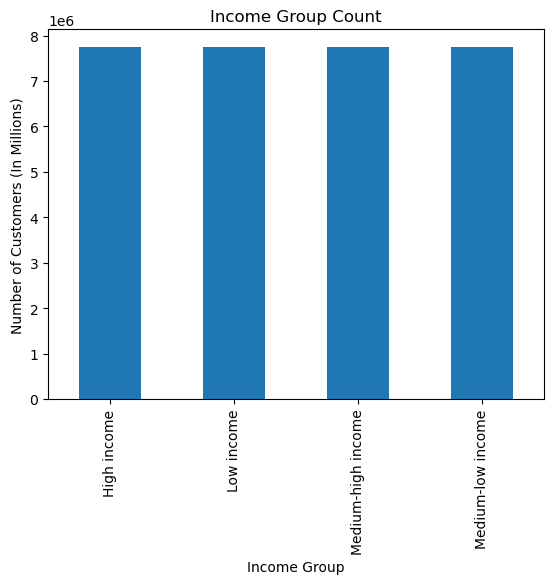

In [25]:
#Frequency table of income_group
income_group_bar = ords_prods['income_group'].value_counts().sort_index().plot.bar()
plt.title('Income Group Count')
plt.xlabel('Income Group')
plt.ylabel('Number of Customers (In Millions)')

## 04. Creating a Customer Profile - Looking at Family Status

In [26]:
#Checking description on age
ords_prods['family_status'].describe()

count     30993489
unique           4
top        married
freq      21763585
Name: family_status, dtype: object

In [27]:
#Checking value_counts on age
ords_prods['family_status'].value_counts(dropna = False).sort_index()

family_status
divorced/widowed                     2647799
living with parents and siblings     1482721
married                             21763585
single                               5099384
Name: count, dtype: int64

Text(0, 0.5, 'Number of Customers (In Ten Millions)')

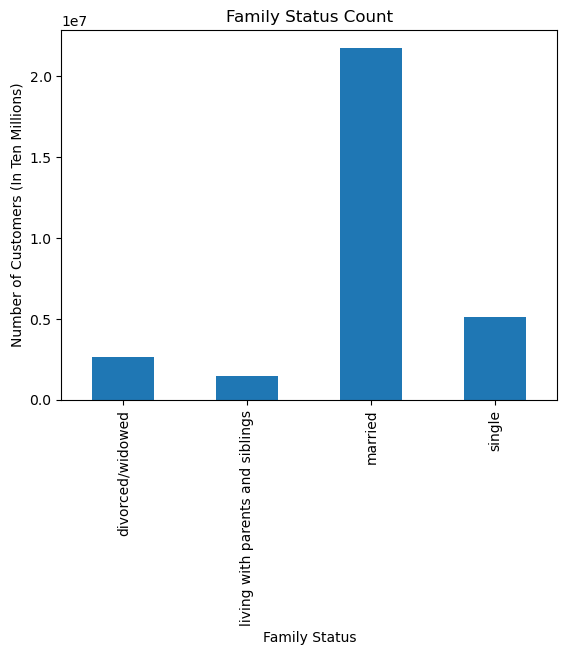

In [29]:
#Frequency table of income_group
family_bar = ords_prods['family_status'].value_counts().sort_index().plot.bar()
plt.title('Family Status Count')
plt.xlabel('Family Status')
plt.ylabel('Number of Customers (In Ten Millions)')

### Creating a crosstab of family_status with age_group.

In [34]:
#Family_status crosstab with age_group
fam_age_cross = pd.crosstab(ords_prods['age_group'], ords_prods['family_status'], dropna = False)

In [35]:
fam_age_cross

family_status,divorced/widowed,living with parents and siblings,married,single
age_group,,,,
Age 18-32,0,1482721,3990667,1818593
Age 33-48,0,0,5833758,1928766
Age 49-64,623839,0,5760204,1352025
Age 65-81,2023960,0,6178956,0


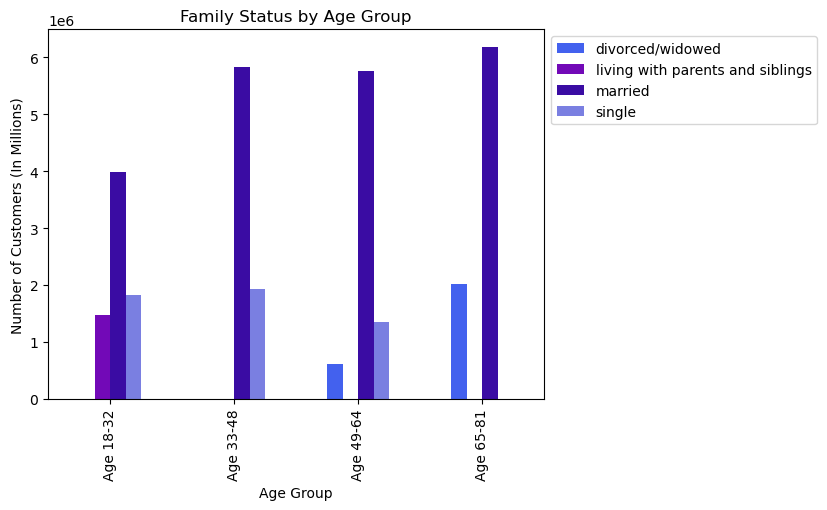

In [38]:
#Creating graph of crosstab
family_age_bar = fam_age_cross.plot.bar(color=['#4361ee', '#7209b7', '#3a0ca3', '#7a7fe1'])
plt.title('Family Status by Age Group')
plt.ylabel('Number of Customers (In Millions)')
plt.xlabel('Age Group')
plt.legend(bbox_to_anchor=(1.0, 1.0))

### Based on this crosstab there are clear sections between age and family status. Divorced/widowed customers are ages 49-81. Living with parents and siblings customers are ages 18-32. Married customers are ages 18-81. Single customers are ages 18-64.

## 04. Creating a Customer Profile - Looking at Dependants

In [40]:
#Checking description on number_of_dependants
ords_prods['number_of_dependants'].describe()

count    3.099349e+07
mean     1.501803e+00
std      1.118900e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: number_of_dependants, dtype: float64

In [41]:
#Checking values of number_of_dependants
ords_prods['number_of_dependants'].value_counts(dropna = False).sort_index()

number_of_dependants
0    7747183
1    7726129
2    7740539
3    7779638
Name: count, dtype: int64

Text(0, 0.5, 'Number of Customers (In Millions)')

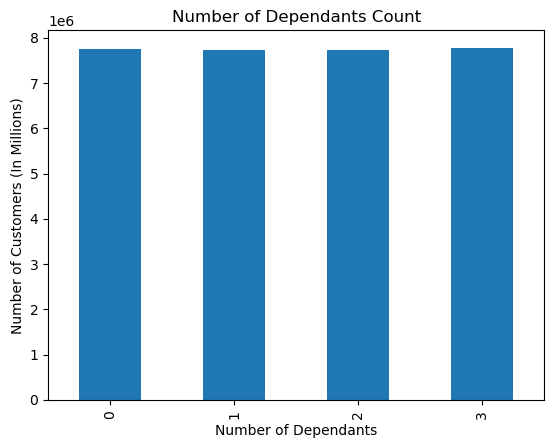

In [44]:
#Frequency table of dependants
dependants_bar = ords_prods['number_of_dependants'].value_counts().sort_index().plot.bar()
plt.title('Number of Dependants Count')
plt.xlabel('Number of Dependants')
plt.ylabel('Number of Customers (In Millions)')

### Creating crosstab of family_status and number_of_dependants.

In [49]:
#Family_status crosstab with number_of_dependants
fam_dependants_cross = pd.crosstab(ords_prods['number_of_dependants'], ords_prods['family_status'], dropna = False)

In [50]:
fam_dependants_cross

family_status,divorced/widowed,living with parents and siblings,married,single
number_of_dependants,,,,
0,2647799,0,0,5099384
1,0,508448,7217681,0
2,0,485218,7255321,0
3,0,489055,7290583,0


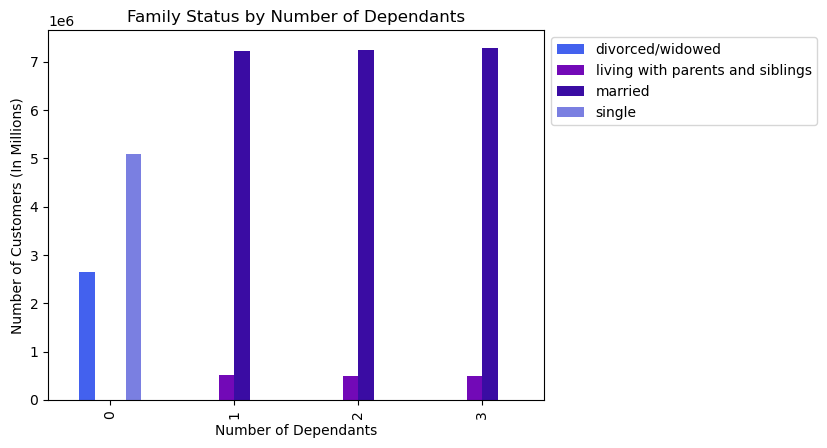

In [51]:
#Creating graph of crosstab
family_dependants_bar = fam_dependants_cross.plot.bar(color=['#4361ee', '#7209b7', '#3a0ca3', '#7a7fe1'])
plt.title('Family Status by Number of Dependants')
plt.ylabel('Number of Customers (In Millions)')
plt.xlabel('Number of Dependants')
plt.legend(bbox_to_anchor=(1.0, 1.0))

### Based on this crosstab, Divorced/widowed customers have 0 dependants. Customers living with parents and siblings have 1-3 dependants. Married customers have 1-3 dependants. Single customers have 0 dependants.

### Creating a crosstab of age_group and number_of_dependants.

In [53]:
#Age_group crosstab with number_of_dependants
age_dependants_cross = pd.crosstab(ords_prods['age_group'], ords_prods['number_of_dependants'], dropna = False)

In [54]:
age_dependants_cross

number_of_dependants,0,1,2,3
age_group,,,,
Age 18-32,1818593,1812790,1825299,1835299
Age 33-48,1928766,1972135,1924821,1936802
Age 49-64,1975864,1910399,1894606,1955199
Age 65-81,2023960,2030805,2095813,2052338


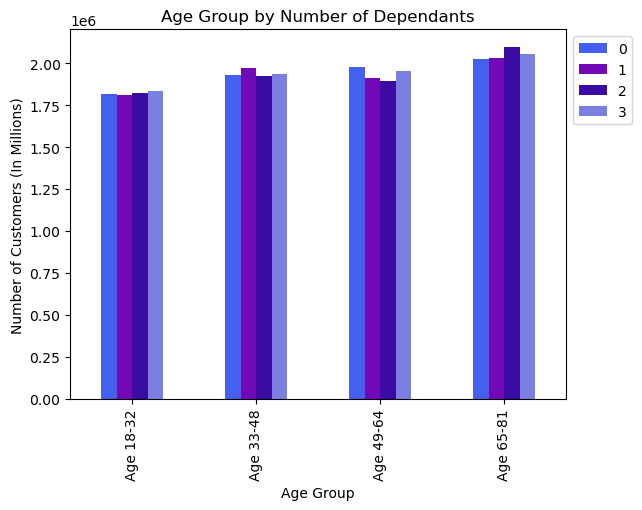

In [55]:
#Creating graph of crosstab
age_dependants_bar = age_dependants_cross.plot.bar(color=['#4361ee', '#7209b7', '#3a0ca3', '#7a7fe1'])
plt.title('Age Group by Number of Dependants')
plt.ylabel('Number of Customers (In Millions)')
plt.xlabel('Age Group')
plt.legend(bbox_to_anchor=(1.0, 1.0))

### There are dependants amoung each age group, which makes sense because married customers range from age 18-81.

### Creating a crosstab of family_status with income.

In [63]:
#Family_status crosstab with income_group
fam_income_cross = pd.crosstab(ords_prods['income_group'], ords_prods['family_status'], dropna = False)

In [64]:
fam_income_cross

family_status,divorced/widowed,living with parents and siblings,married,single
income_group,,,,
High income,1012650,17785,5784182,933625
Low income,331459,664686,5151901,1600410
Medium-high income,940936,94661,5704652,1007092
Medium-low income,362754,705589,5122850,1558257


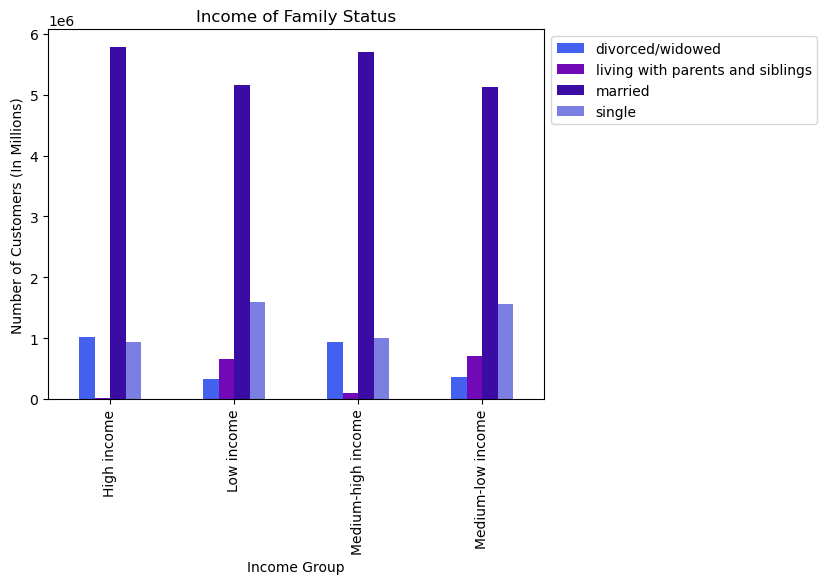

In [65]:
#Creating graph of crosstab
fam_income_bar = fam_income_cross.plot.bar(color=['#4361ee', '#7209b7', '#3a0ca3', '#7a7fe1'])
plt.title('Income of Family Status')
plt.ylabel('Number of Customers (In Millions)')
plt.xlabel('Income Group')
plt.legend(bbox_to_anchor=(1.0, 1.0))

### Creating a crosstab of age_group with income.

In [67]:
#Age_group crosstab with income_group
age_income_cross = pd.crosstab(ords_prods['income_group'], ords_prods['age_group'], dropna = False)

In [68]:
age_income_cross

age_group,Age 18-32,Age 33-48,Age 49-64,Age 65-81
income_group,,,,
High income,82100,1555828,2969928,3140386
Low income,3381112,2283299,1028859,1055186
Medium-high income,475146,1648335,2727243,2896617
Medium-low income,3353623,2275062,1010038,1110727


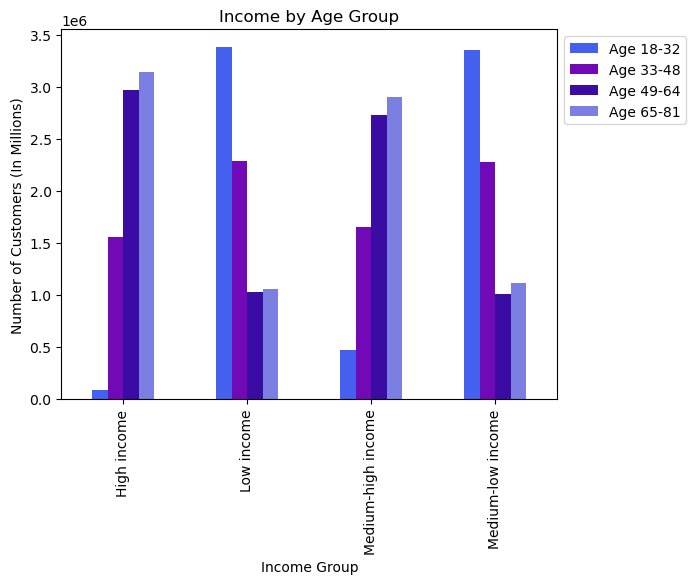

In [71]:
#Creating graph of crosstab
age_income_bar = age_income_cross.plot.bar(color=['#4361ee', '#7209b7', '#3a0ca3', '#7a7fe1'])
plt.title('Income by Age Group')
plt.ylabel('Number of Customers (In Millions)')
plt.xlabel('Income Group')
plt.legend(bbox_to_anchor=(1.0, 1.0))

### Creating a crosstab of number_of_dependants with income.

In [74]:
#Number_of_dependants crosstab with income_group
dependant_income_cross = pd.crosstab(ords_prods['income_group'], ords_prods['number_of_dependants'], dropna = False)

In [75]:
dependant_income_cross

number_of_dependants,0,1,2,3
income_group,,,,
High income,1946275,1915785,1937606,1948576
Low income,1931869,1928528,1940714,1947345
Medium-high income,1948028,1928168,1927615,1943530
Medium-low income,1921011,1953648,1934604,1940187


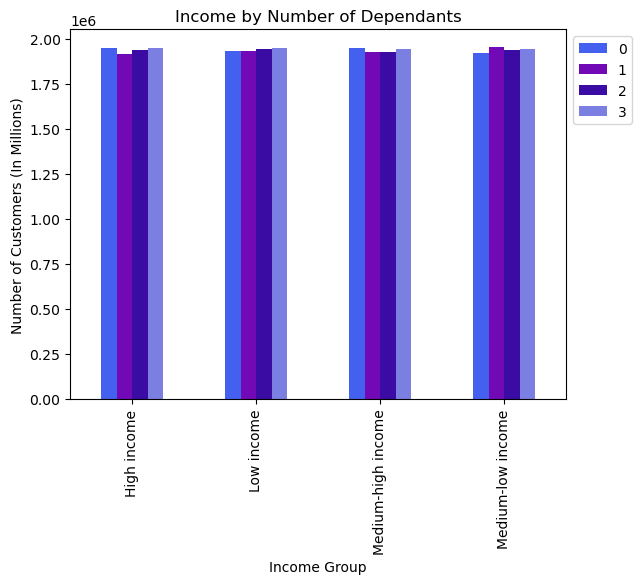

In [77]:
#Creating graph of crosstab
dependant_income_bar = dependant_income_cross.plot.bar(color=['#4361ee', '#7209b7', '#3a0ca3', '#7a7fe1'])
plt.title('Income by Number of Dependants')
plt.ylabel('Number of Customers (In Millions)')
plt.xlabel('Income Group')
plt.legend(bbox_to_anchor=(1.0, 1.0))

### Dependants does not seem to affect income. Age 18-32 has the least amount of high income customers and most amount of low income customers. Age 65-81 has the most high income customers. Based on family status, married customers make up the majority of all income ranges.

## 05. Creating a Customer Profile - Finalization

### From the above crosstabs we can break down each family status by number of dependants and age. Divorced/widowed = no dependants, ages 49-81. Single =  no dependants, ages 18-64. Living with parents and siblings = 1-3 dependants, ages 18-32. Married = 1-3 dependants, ages 18-81

### These groups can then be turned into customer profiles:
### Younger, single, no dependants (Ages 18-32, single, no dependants, possibly low income)
### Middle, single, no dependants (Ages 33-64, single, no dependants, possibly medium incomes)
### Older, single, no dependants (Ages 65-81, single, no dependants, possibly high income)
### Younger, married, dependants (Ages 18-32, married, 1-3 dependants, possibly low income)
### Middle, married, dependants (Ages 33-64, married, 1-3 dependants, possibly medium incomes)
### Older, married, dependants (Ages 65-81, married, 1-3 dependants, possibly high income)
### Young, single, dependants (Ages 18-32, single, 1-3 dependants, possibly low income)

### Creating conditions for customer_profile flag.

In [ ]:
#Younger single no dependants (Ages 18-32, single, no dependants)
ords_prods.loc[(ords_prods['age_group'] == 'Age 18-32') & (ords_prods['family_status'] == 'single') & (ords_prods['number_of_dependants'] == 0), 'customer_profile'] = 'younger single no dependants'

In [ ]:
#Middle single no dependants (Ages 33-64, single, no dependants)
ords_prods.loc[(ords_prods['age'] > 32) & (ords_prods['age'] <= 64) & (ords_prods['family_status'] == 'single') & (ords_prods['number_of_dependants'] == 0), 'customer_profile'] = 'middle single no dependants'

In [ ]:
#Middle single no dependants (Ages 33-64, divorced/widowed, no dependants)
ords_prods.loc[(ords_prods['age'] <= 64) & (ords_prods['family_status'] == 'divorced/widowed') & (ords_prods['number_of_dependants'] == 0), 'customer_profile'] = 'middle single no dependants'

In [ ]:
#Older single no dependants (Ages 65-81, divorced/widowed, no dependants)
ords_prods.loc[(ords_prods['age'] > 64) & (ords_prods['family_status'] == 'divorced/widowed') & (ords_prods['number_of_dependants'] == 0), 'customer_profile'] = 'older single no dependants'

In [ ]:
#Younger married dependants (Ages 18-32, married, 1-3 dependants)
ords_prods.loc[(ords_prods['age_group'] == 'Age 18-32') & (ords_prods['family_status'] == 'married') & (ords_prods['number_of_dependants'] >= 1), 'customer_profile'] = 'younger married dependants'

In [ ]:
#Middle married dependants (Ages 33-64, married, dependants)
ords_prods.loc[(ords_prods['age'] > 32) & (ords_prods['age'] <= 64) & (ords_prods['family_status'] == 'married') & (ords_prods['number_of_dependants'] >= 1), 'customer_profile'] = 'middle married dependants'

In [ ]:
#Older married dependants (Ages 65-81, married, dependants)
ords_prods.loc[(ords_prods['age'] > 64) & (ords_prods['family_status'] == 'married') & (ords_prods['number_of_dependants'] >= 1), 'customer_profile'] = 'older married dependants'

In [ ]:
#Younger single dependants (Ages 18-32, single, dependants)
ords_prods.loc[(ords_prods['age_group'] == 'Age 18-32') & (ords_prods['family_status'] == 'living with parents and siblings') & (ords_prods['number_of_dependants'] >= 1), 'customer_profile'] = 'younger single dependants'

In [ ]:
#Checking output of customer_profile
ords_prods['customer_profile'].value_counts(dropna = False).sort_index()

In [ ]:
#Checking shape of customer_profile
ords_prods['customer_profile'].shape

In [ ]:
#Frequency table of customer_profile
customer_profile_bar = ords_prods['customer_profile'].value_counts().sort_index().plot.bar()
plt.title('Customer Profile Count')
plt.xlabel('Customer Profile')
plt.ylabel('Number of Customers (In Ten millions)')

In [ ]:
#Checking customer_profile against fam_age_cross
fam_age_cross

## 06. Export Charts and Data

In [ ]:
#Exporting age_group bar chart
age_group_bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'age_group_bar.png'))

In [ ]:
#Exporting income_group bar chart
income_group_bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'income_group_bar.png'))

In [30]:
#Exporting family status bar chart
family_bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'family_bar.png'))

In [39]:
#Exporting family by age bar chart
family_age_bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'family_age_bar.png'))

In [45]:
#Exporting dependants bar chart
dependants_bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'dependants_bar.png'))

In [52]:
#Exporting family by dependants bar chart
family_dependants_bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'family_dependants_bar.png'))

In [56]:
#Exporting age by dependants bar chart
age_dependants_bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'age_dependants_bar.png'))

In [66]:
#Exporting family by income bar chart
fam_income_bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'fam_income_bar.png'))

In [72]:
#Exporting age by income bar chart
age_income_bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'age_income_bar.png'))

In [78]:
#Exporting dependant by income bar chart
dependant_income_bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'dependant_income_bar.png'))

In [ ]:
#Exporting customer_profile bar chart
customer_profile_bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'customer_profile_bar.png'))

In [ ]:
#Exporting ords_prods as orders_products_all_profile.pkl
ords_prods.to_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'orders_products_all_profile.pkl'))